In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [2]:
df = pd.read_csv("supply_chain_clean_data.csv")
df.head()

,Unnamed: 0,product_type,sku,price,availability,number_of_products_sold,revenue_generated,customer_demographics,stock_levels,lead_times,...,defect_rates,transportation_modes,routes,costs,total_lead_time,cost_per_unit,shipping_delay_flag,inventory_health,defeat_category,estimated_profit
0,0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,...,0.226410,Road,Route B,187.752075,36,0.234105,0,-38,Low Defects,18869.557293
1,1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,...,4.854068,Road,Route B,503.065579,60,0.683513,0,16,High Defects,-13817.108813
2,2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,...,4.580593,Air,Route C,141.920282,37,17.740035,0,-87,High Defects,-154.946688
3,3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,...,4.746649,Rail,Route A,254.776159,31,3.069592,0,-36,High Defects,2119.703934
4,4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,...,3.145580,Air,Route A,923.440632,6,1.060207,1,-51,High Defects,-76003.167835


# A. Sales & Revenue Analysis

### 1. Revenue Distribution

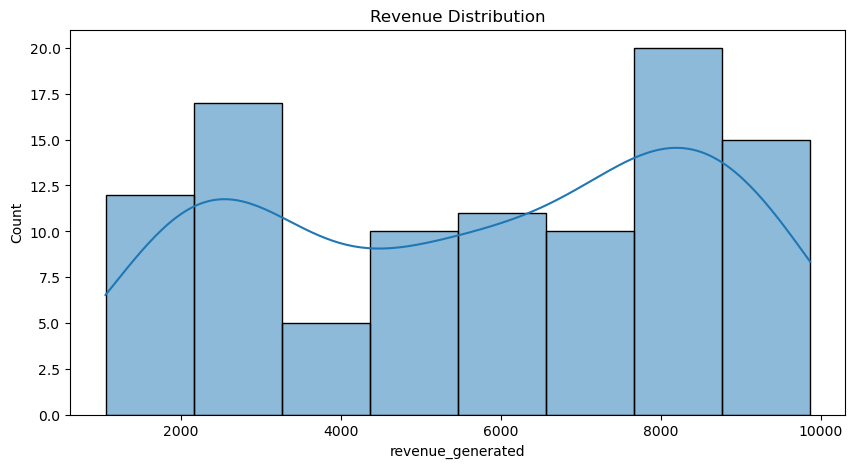

In [3]:
plt.figure(figsize=(10, 5))
sns.histplot(df["revenue_generated"], kde=True)
plt.title("Revenue Distribution")
plt.show()

### 2. Revenue by Product Type

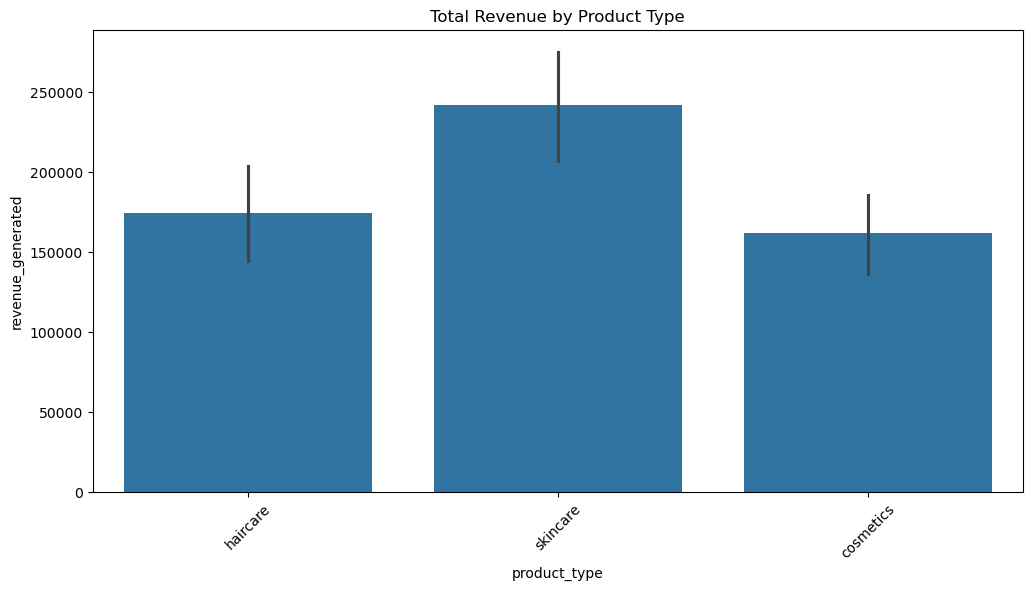

In [4]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="product_type", y="revenue_generated", estimator=sum)
plt.xticks(rotation=45)
plt.title("Total Revenue by Product Type")
plt.show()

# B. Inventory Analysis

### 1. Stock Level Distribution

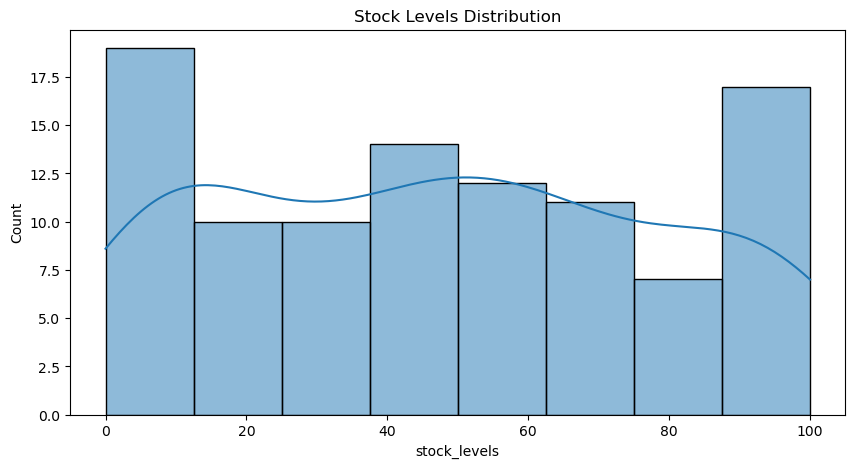

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df["stock_levels"], kde=True)
plt.title("Stock Levels Distribution")
plt.show()

### 2. Inventory Health (Good Vs Bad)

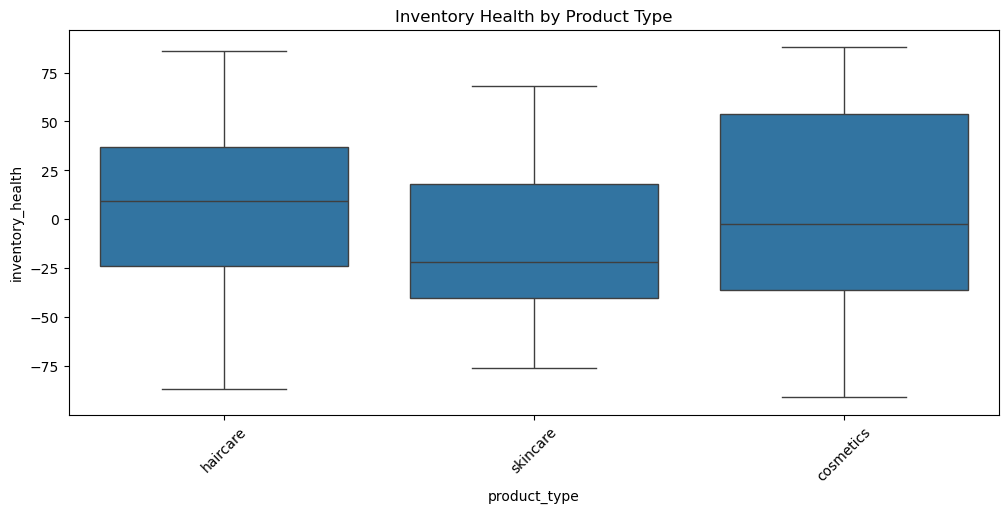

In [7]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="product_type", y="inventory_health")
plt.xticks(rotation=45)
plt.title("Inventory Health by Product Type")
plt.show()

# C. Lead Time & Shipping Time Analysis

### 1. lead Time Distribution

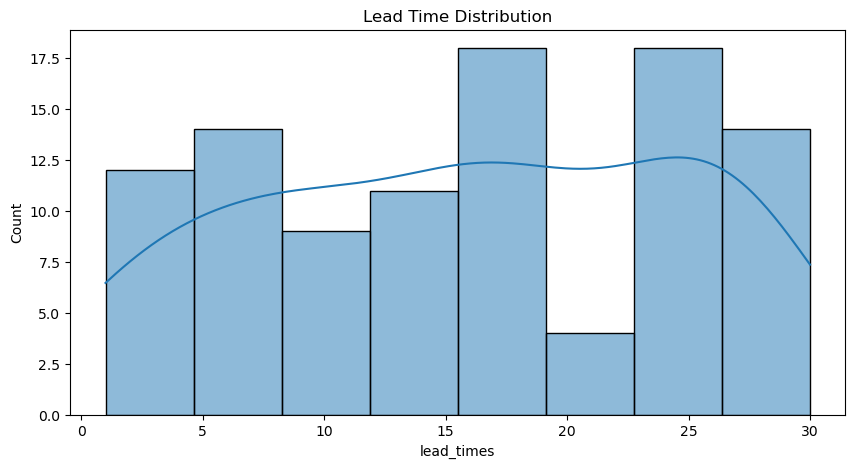

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df["lead_times"], kde=True)
plt.title("Lead Time Distribution")
plt.show()

### 2. Shipping Time Comparison by Transport Mode

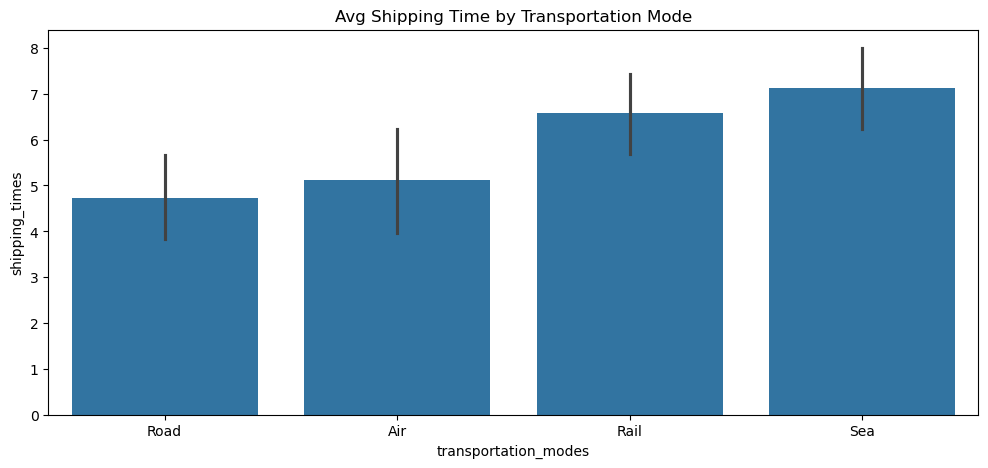

In [10]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df, x="transportation_modes", y="shipping_times")
plt.title("Avg Shipping Time by Transportation Mode")
plt.show()

# D. Manufacturing Efficiency

### 1. Manufacturing Cost Distribution

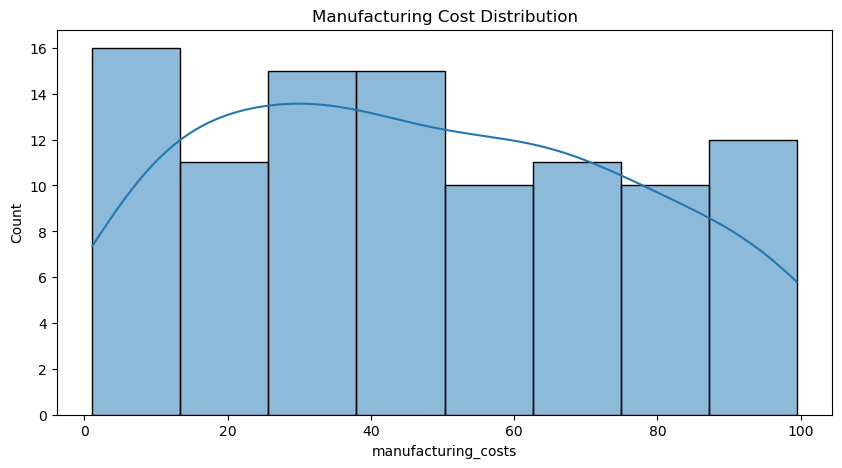

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df["manufacturing_costs"], kde=True)
plt.title("Manufacturing Cost Distribution")
plt.show()

### 2. Defect Rate by Product Type

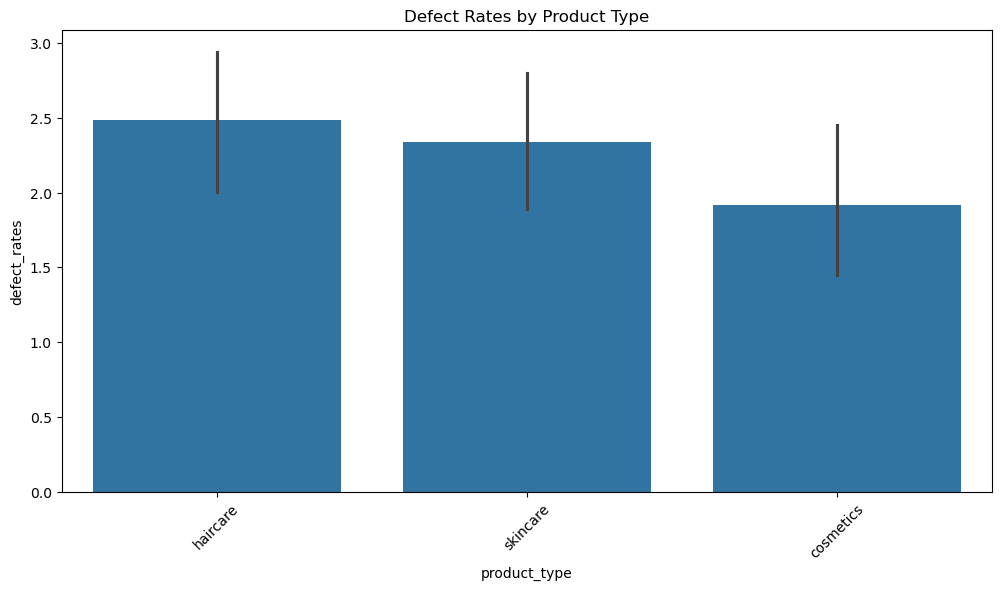

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="product_type", y="defect_rates")
plt.xticks(rotation=45)
plt.title("Defect Rates by Product Type")
plt.show()

### 3. Inspection Result Counts

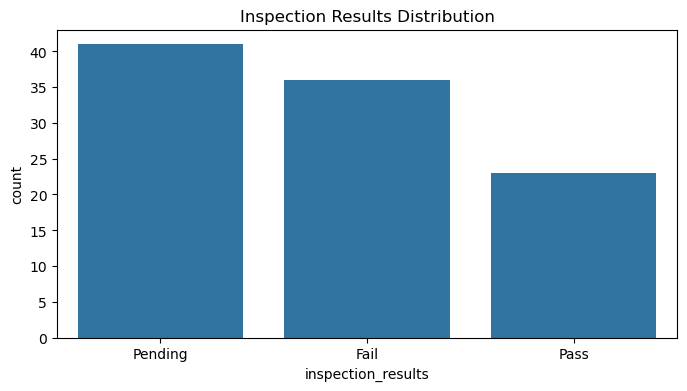

In [15]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="inspection_results")
plt.title("Inspection Results Distribution")
plt.show()

# E. Logistic Cost Analysis

### 1. Cost Distribution

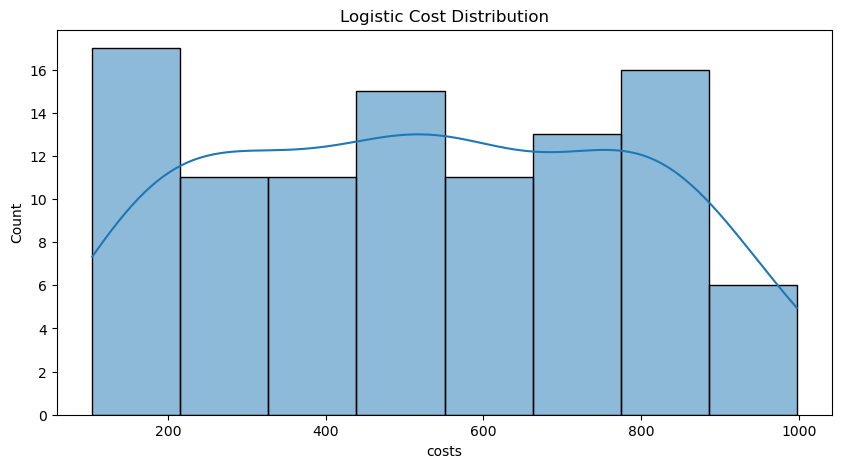

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df["costs"], kde=True)
plt.title("Logistic Cost Distribution")
plt.show()

### 2. Transportation Mode vs Cost

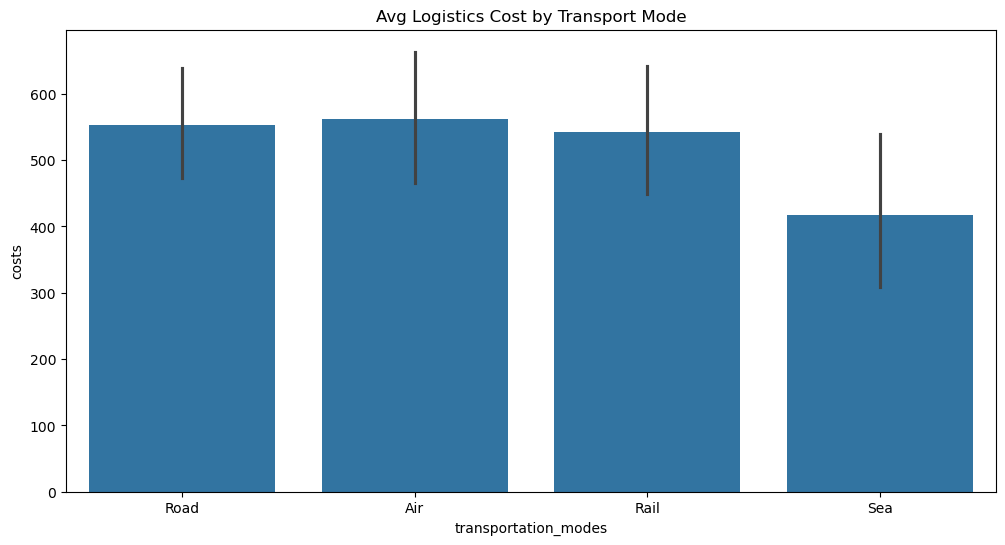

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="transportation_modes", y="costs")
plt.title("Avg Logistics Cost by Transport Mode")
plt.show()

### 3. Routes vs Cost

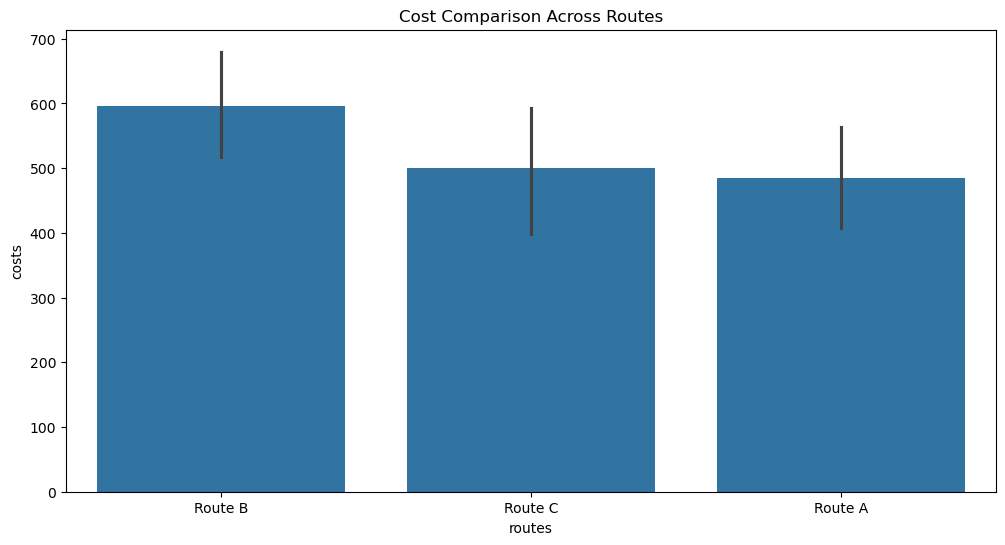

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="routes", y="costs")
plt.title("Cost Comparison Across Routes")
plt.show()

# F. Correlation Heatmap

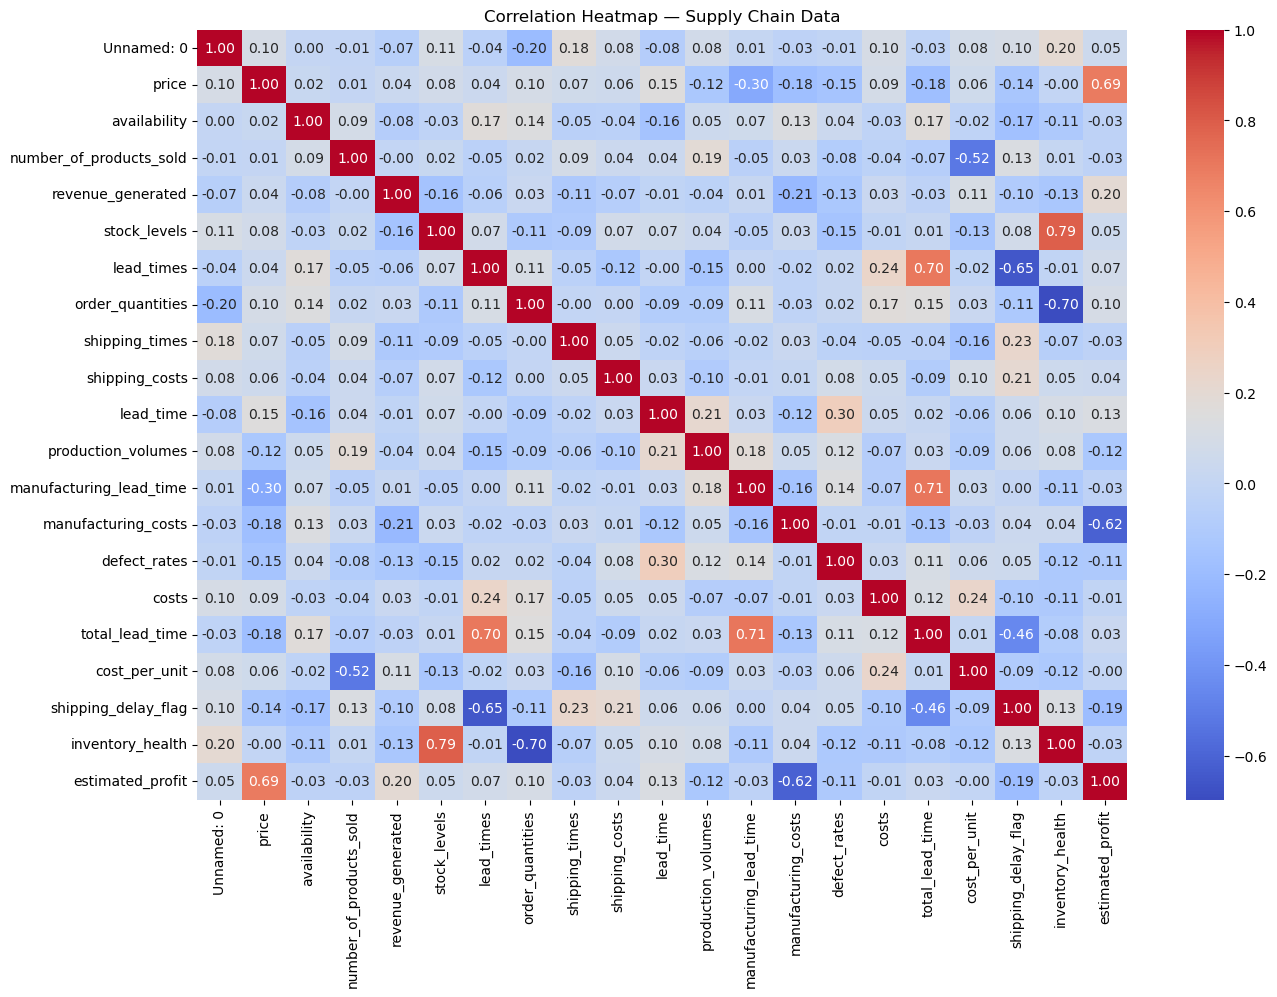

In [23]:
plt.figure(figsize=(15,10))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap — Supply Chain Data")
plt.show()

### Key Insights

In [24]:
print("📌 Average Lead Time:", round(df["lead_times"].mean(), 2))
print("📌 Average Manufacturing Lead Time:", round(df["manufacturing_lead_time"].mean(), 2))
print("📌 Average Shipping Time:", round(df["shipping_times"].mean(), 2))
print("📌 Average Defect Rate:", round(df["defect_rates"].mean(), 2))
print("📌 Average Inventory Health:", round(df["inventory_health"].mean(), 2))
print("📌 Total Revenue:", df["revenue_generated"].sum())
print("📌 Highest Selling Product Type:", df.groupby("product_type")["number_of_products_sold"].sum().idxmax())
print("📌 Most Expensive Transport Mode:", df.groupby("transportation_modes")["costs"].mean().idxmax())

📌 Average Lead Time: 15.96
📌 Average Manufacturing Lead Time: 14.77
📌 Average Shipping Time: 5.75
📌 Average Defect Rate: 2.28
📌 Average Inventory Health: -1.45
📌 Total Revenue: 577604.8187399999
📌 Highest Selling Product Type: skincare
📌 Most Expensive Transport Mode: Air


# Database Connection 

In [25]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="supply_chain_db"
)

print("Connected Successfull!")

cursor = conn.cursor()

Connected Successfull!


In [29]:
from sqlalchemy import create_engine

engine = create_engine('mysql+pymysql://root:@localhost/supply_chain_db')

df.to_sql('supply_chain_data', con=engine, if_exists='replace', index=False)

print("Data Successfully import into MYSQL")

Data Successfully import into MYSQL
